<a href="https://colab.research.google.com/github/andrian2020/Skill_github/blob/master/LinearRegression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import mean_squared_error as mse

In [7]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/asset-v1_Skillfactory+MLO-WEEKLY-2+14APR2020+type@asset+block@data_flats2 (1).xls', sep =';')

In [10]:
df.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,0,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,1,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,0,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,0,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,0,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [12]:
df.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

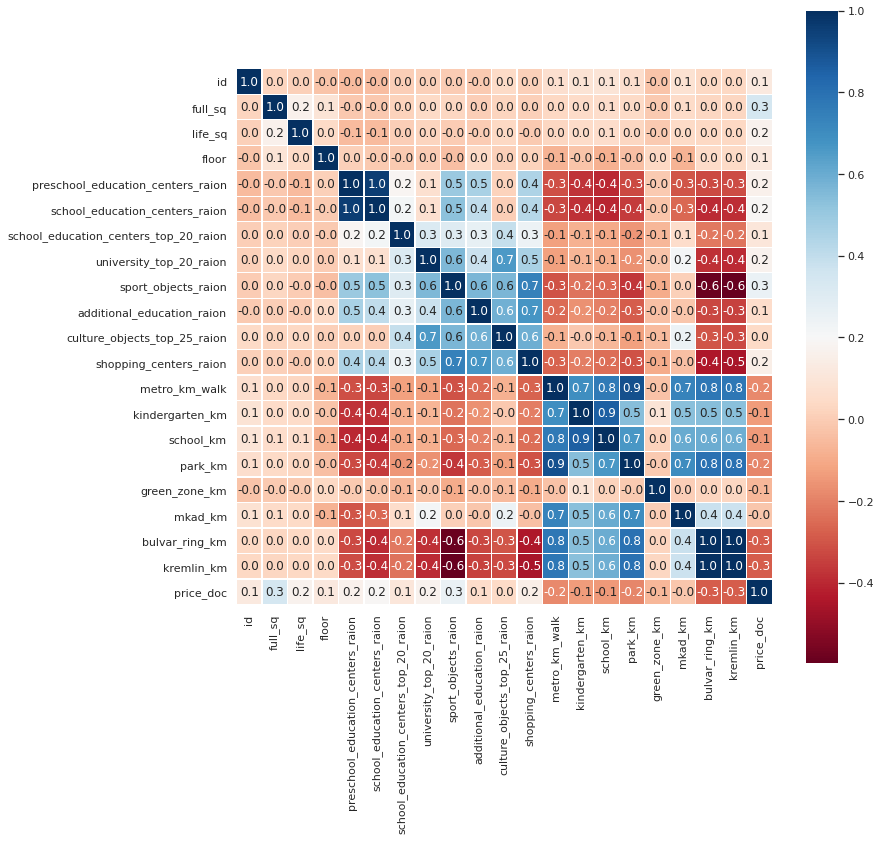

In [13]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

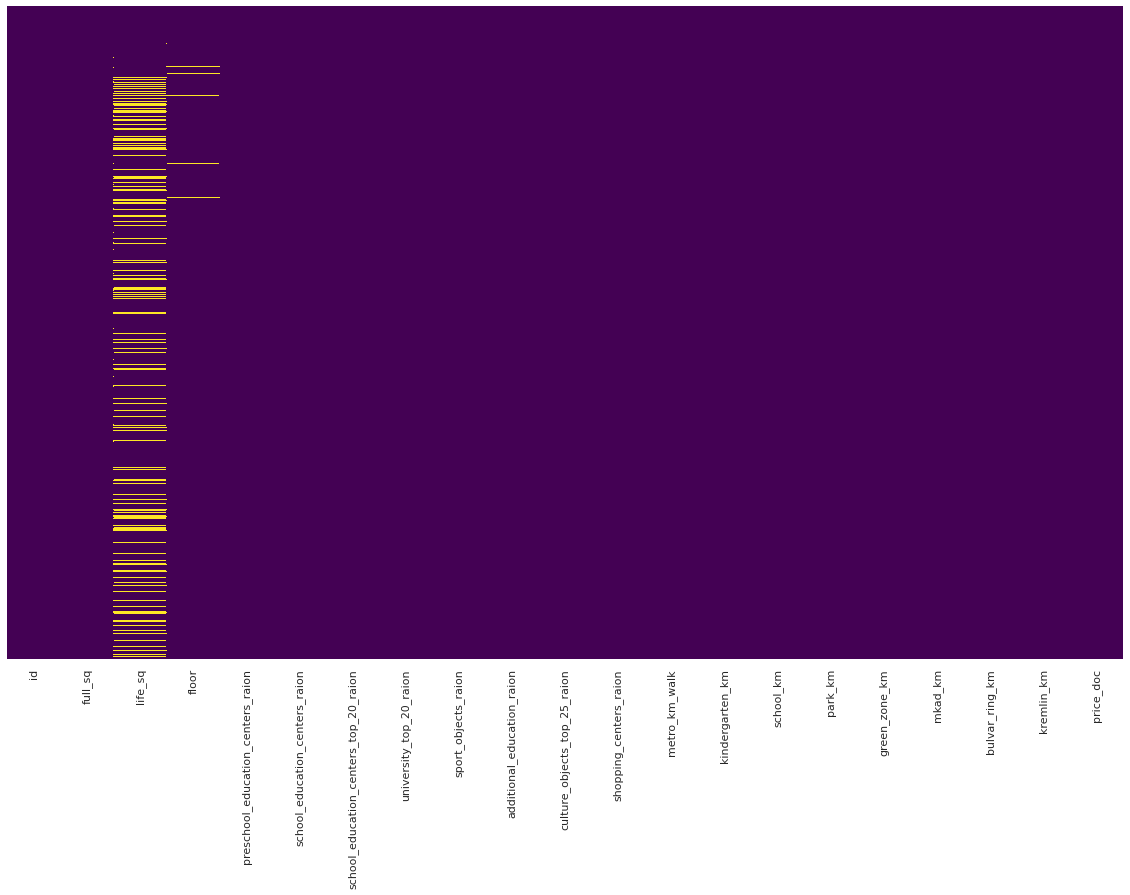

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

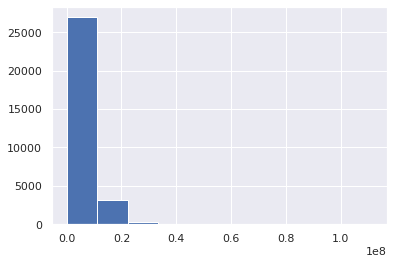

In [16]:
df.price_doc.hist()

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логарифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

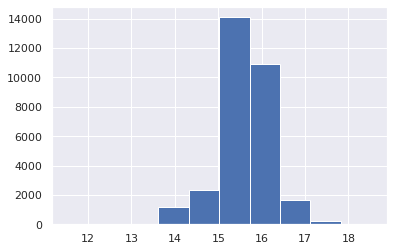

In [17]:
df['price_doc'] = df['price_doc'].apply(lambda w: np.log(w+1))
df.price_doc.hist()

In [18]:
df_model = df.drop(['preschool_education_centers_raion','kindergarten_km','park_km','kremlin_km','life_sq'],axis=1)

In [19]:
df_model = df_model.dropna()

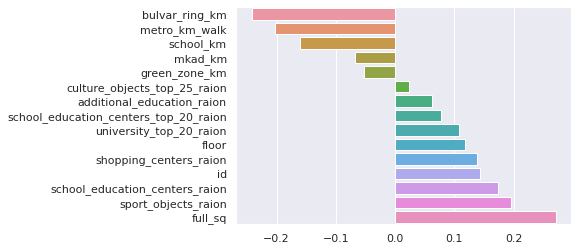

In [28]:
corelations = df_model.drop(['price_doc'], axis=1).corrwith(df['price_doc']).sort_values(ascending=True)
plot = sns.barplot(y=corelations.index, x=corelations)

In [26]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30277 entries, 0 to 30468
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30277 non-null  int64  
 1   full_sq                                30277 non-null  int64  
 2   floor                                  30277 non-null  float64
 3   school_education_centers_raion         30277 non-null  int64  
 4   school_education_centers_top_20_raion  30277 non-null  int64  
 5   university_top_20_raion                30277 non-null  int64  
 6   sport_objects_raion                    30277 non-null  int64  
 7   additional_education_raion             30277 non-null  int64  
 8   culture_objects_top_25_raion           30277 non-null  int64  
 9   shopping_centers_raion                 30277 non-null  int64  
 10  metro_km_walk                          30277 non-null  float64
 11  sc

In [21]:
df_model.isnull().sum()

id                                       0
full_sq                                  0
floor                                    0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
metro_km_walk                            0
school_km                                0
green_zone_km                            0
mkad_km                                  0
bulvar_ring_km                           0
price_doc                                0
dtype: int64

In [22]:
X = df_model.drop(['id','price_doc'],axis=1)
Y = df_model['price_doc']

In [23]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.2, random_state=77)

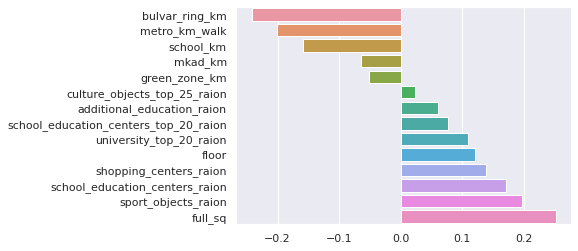

In [24]:
corelations = X_train.corrwith(Y_train).sort_values(ascending=True)
plot = sns.barplot(y=corelations.index, x=corelations)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
X_train_transf =scaler.fit_transform(X_train)
X_test_transf = scaler.transform(X_val)

In [ ]:
model = LinearRegression()
model.fit(X_train_transf,Y_train)
Y_pred = model.predict(X_test_transf)

In [ ]:
MSE = mse(np.exp(Y_val)-1,np.exp(Y_pred)-1)

In [ ]:
print(round(MSE,0))

16818684371715.0
